In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.ticker import FormatStrFormatter

In [2]:
from ExploratoryAnalysis import ExploratoryAnalysis

In [3]:
dataset_paysim = pd.read_csv("../data/paysim_dataset.csv")
dataset_paysim = dataset_paysim[dataset_paysim["step"] <= 3]

In [4]:
eda = ExploratoryAnalysis(dataset_paysim, "isFraud", "nameOrig", "nameDest", "step")

In [5]:
len(eda.getUniqueNodes())

6876

In [6]:
eda.getNumberOfEdges()

4274

In [7]:
eda.getMissingValues()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
eda.getDatasetOverview()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
eda.getNumberOfTransactionClasses()

2

In [10]:
eda.getTransactionClassesValues()

array([0, 1])

In [11]:
eda.getTransactionClassesDistribution()

0    4246
1      28
Name: isFraud, dtype: int64

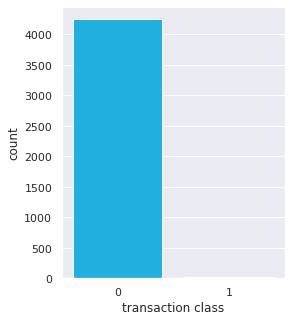

In [12]:
plt.figure(figsize=(4,5))
sns.barplot(x=eda.getTransactionClassesDistribution().index, y=eda.getTransactionClassesDistribution(), color="deepskyblue")
plt.ylabel("count")
plt.xlabel("transaction class")
plt.show()

In [13]:
eda.getNumberOfTimeSteps()

3

In [14]:
eda.getGraphSizesDistribution()

,TimeStep,Size
0,1,2708
1,2,1014
2,3,552


In [15]:
eda.getFraudDistributionInTimesteps()

,TimeStep,NumberOfFraudulentTransactions
0,1,16
1,2,8
2,3,4


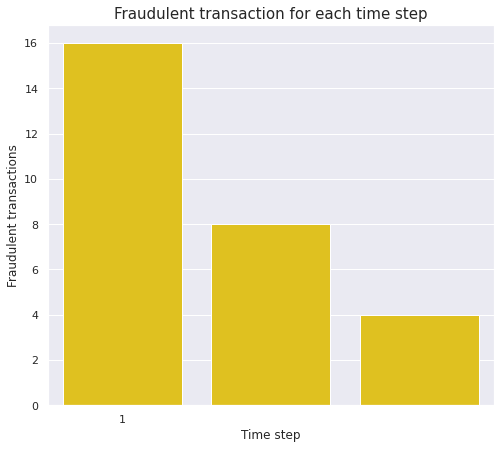

In [16]:
eda.plotFraudInTimesteps()

In [17]:
print(f"The number of financial transactions: {dataset_paysim.shape[0]}")
print(f"The number of attributes: {dataset_paysim.shape[1]}")
print(f"The number of unique source accounts: {len(dataset_paysim.nameOrig.unique())}")
print(f"The number of unique destination accounts: {len(dataset_paysim.nameDest.unique())}")

The number of financial transactions: 4274
The number of attributes: 11
The number of unique source accounts: 4274
The number of unique destination accounts: 2602


In [18]:
print("\n-------\tTRANSACTION INFORMATION\t-------\n")
print(f"The most common type of transaction: {str(dataset_paysim.type.mode()).split()[1]}")
print("Transactions - frequencies:")
print(dataset_paysim.type.value_counts())


-------	TRANSACTION INFORMATION	-------

The most common type of transaction: PAYMENT
Transactions - frequencies:
PAYMENT     2240
CASH_IN      854
CASH_OUT     544
TRANSFER     392
DEBIT        244
Name: type, dtype: int64


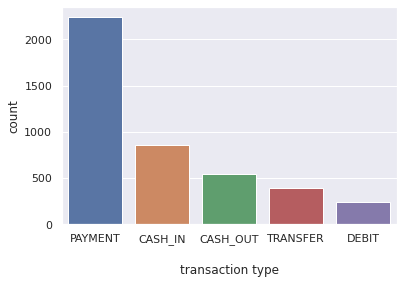

In [19]:
sns.barplot(x=dataset_paysim.type.value_counts().index, y=dataset_paysim.type.value_counts())
plt.xlabel("\ntransaction type")
plt.ylabel("count")
plt.show()

In [20]:
print("\n-------\tAMOUNTS INFORMATION\t-------\n")
print(f"Maximal transaction amount: {dataset_paysim.amount.max()}")
print(f"Mean for the transaction amount: {dataset_paysim.amount.mean()}")
print(f"Median for the transaction amount: {dataset_paysim.amount.median()}")
print(f"Standard deviation of the transaction amount: {dataset_paysim.amount.std()}")


-------	AMOUNTS INFORMATION	-------

Maximal transaction amount: 3776389.09
Mean for the transaction amount: 97015.59887459053
Median for the transaction amount: 10809.52
Standard deviation of the transaction amount: 227200.22841302538


In [21]:
print("\n-------\tFRAUDULENT TRANSACTIONS INFORMATION\t-------\n")
print(f"The number of fraudulent transactions: {len(dataset_paysim[dataset_paysim.isFraud == 1])}")
print(f"The fraction of transaction which are fraudulent: {round(len(dataset_paysim[dataset_paysim.isFraud == 1])/len(dataset_paysim), 4)}")
print(f"The number of flagged transactions: {len(dataset_paysim[dataset_paysim.isFlaggedFraud == 1])}")
print(f"The proportion of flagged transactions to fraudulent transactions: {round(len(dataset_paysim[dataset_paysim.isFlaggedFraud == 1])/len(dataset_paysim[dataset_paysim.isFraud == 1]), 4)}")
print(f"The mean amount for fraudulent transactions: {round(dataset_paysim[dataset_paysim.isFraud == 1]['amount'].mean(), 2)}")
print(f"The median amount for fraudulent transactions: {round(dataset_paysim[dataset_paysim.isFraud == 1]['amount'].median(), 2)}")


-------	FRAUDULENT TRANSACTIONS INFORMATION	-------

The number of fraudulent transactions: 28
The fraction of transaction which are fraudulent: 0.0066
The number of flagged transactions: 0
The proportion of flagged transactions to fraudulent transactions: 0.0
The mean amount for fraudulent transactions: 285488.29
The median amount for fraudulent transactions: 23974.23


In [22]:
def zScore(attribute):
    return ((attribute - attribute.mean()) / attribute.std())

len(dataset_paysim[(zScore(dataset_paysim["amount"]) > 3) | (zScore(dataset_paysim["amount"]) < -3)])

69

In [31]:
def plotAmountDistribution(transaction_class_value, limit=None):
    subset = None
    if limit is not None:
        subset = dataset_paysim[(dataset_paysim["isFraud"] == transaction_class_value) & (dataset_paysim["amount"] <= limit)]["amount"] / 1_000_000
    else:
        subset = dataset_paysim[dataset_paysim["isFraud"] == transaction_class_value]["amount"] / 1_000_000
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8,10))
    ax = sns.histplot(subset,
                 color="gold",
                 kde=False,
                 stat="count",
                 linewidth=0)
    #
    # ax.containers[0].remove()  # remove the bars
    # ax.relim()  # the axis limits need to be recalculated without the bars
    # ax.autoscale_view()

    ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

    ax.set_xlabel("amount (in millions)", fontsize=12)
    ax.set_ylabel("count", fontsize=12)
    #ax.set_title(f"Distribution for transaction amounts of transaction class: {transaction_class_value}", fontsize=14)
    plt.xticks(rotation=45)
    plt.savefig(f"../visualizations/sample_1_3_distribution_of_amounts_class{transaction_class_value}.png")
    plt.show()

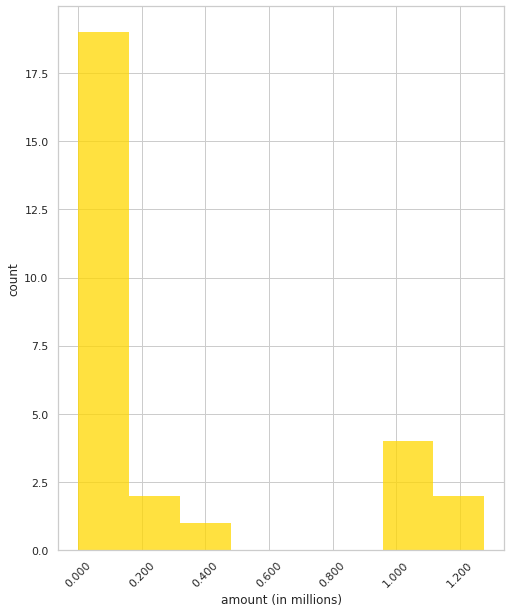

In [32]:
plotAmountDistribution(1, limit=None)

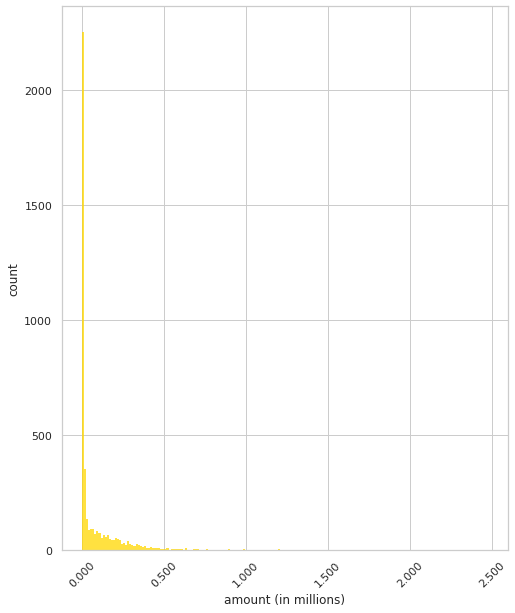

In [33]:
plotAmountDistribution(0, limit=2500000)

In [26]:
transaction_categories = pd.DataFrame(dataset_paysim.groupby("type")["isFraud"].value_counts())
transaction_categories.columns = ["count"]
transaction_categories = transaction_categories.reset_index()
transaction_categories

,type,isFraud,count
0,CASH_IN,0,854
1,CASH_OUT,0,529
2,CASH_OUT,1,15
3,DEBIT,0,244
4,PAYMENT,0,2240
5,TRANSFER,0,379
6,TRANSFER,1,13


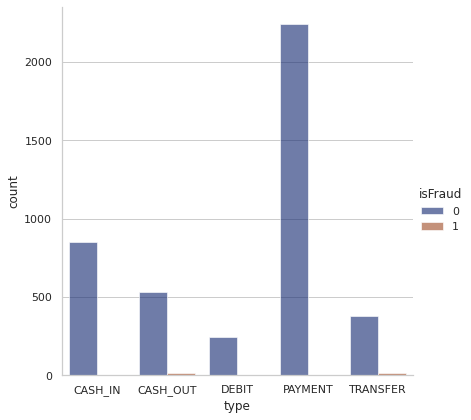

In [27]:
sns.catplot(data=transaction_categories, kind="bar", x="type", y="count", hue="isFraud", ci="sd", palette="dark", alpha=.6, height=6)
plt.show()